In [1]:

import numpy as np
#port matplotlib.pyplot as plt

In [2]:
from matplotlib import pyplot

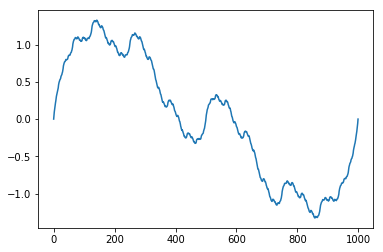

In [3]:
x=0
for n in range(60):
    x+=2**(-n)*np.sin(2**n*np.linspace(0,1,1000)*2*np.pi)
pyplot.plot(x)

In [4]:


def relu(x):
    return np.maximum(x,0)

def Drelu(x):
    return np.sign(x)

In [5]:
def forward_pass(x,g):
    h=[x]
    for n in range(len(g)):
        h.append(np.matmul(g[n],h[-1]))
        h.append(relu(h[-1]))
    return h
                 
def backward_pass(h,l,g):
    u=[]
    d=[l]
    for n in range(len(h)-1):
        if n%2==0:
            d.append(np.multiply(np.transpose(Drelu(h[-2-n])),d[-1]))
        else:
            u.append(np.matmul(np.transpose(d[-1]),np.transpose(h[-2-n])))
            d.append(np.matmul(d[-1],g[-1-(n-1)//2]))
    u.reverse()
    return u

In [47]:
def initialize(liste):
    g=[]
    for i in range(len(liste)-1):
        g.append(np.random.normal(loc=0,scale=2,size=[liste[i+1],liste[i]]))
    return g

def update(m,div,learning_rate,lamb=0,method="momentum",mu=0,dm=0):
    _m = div[0]
    for ix in range(1,len(div)):
        _m = [_m[j] + div[ix][j] for j in range(len(_m))]
    d_ = [_m[f]/len(div) + lamb*m[f] for f in range(len(m))]
    if method=="basic":
        dm = d_
    elif method=="momentum":
        dm = [mu*d_[f] + (1 - mu)*dm[f] for f in range(len(m))]
    for f in range(len(m)):
        m[f] = m[f] - learning_rate*dm[f]
    return m , dm

In [65]:
def get_example(N): 
    out = []
    for i in range(N):
        x = np.random.randint(3,size=2)
        y = float(bool(x[0])!=bool(x[1]))
        out.append([np.reshape(x,[2,1]),np.array(y)])
    return out


In [79]:
numbatches=10
gg=initialize([2,5,3,1])
_dm=[x*0 for x in gg]
loss =[]
for iter in range(2000):
    ot = get_example(numbatches)
    đ=[]
    for j in range(numbatches):
        h_ = forward_pass(ot[j][0],gg)
        l = h_[-1]-ot[j][1]
        đ.append(backward_pass(h_,l,gg))
    gg , _dm= update(gg,đ,mu=0.0001,learning_rate=0.001,lamb=0.001,dm=_dm,method="momentum")
    loss.append(np.abs(l)[0])

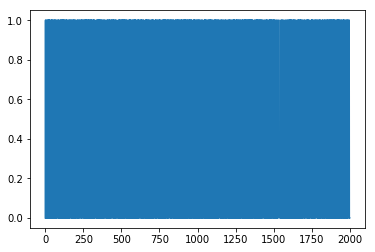

In [80]:
pyplot.plot(loss)

In [26]:
forward_pass(np.reshape(np.array([0,1]),[2,1]),gg)[-1]

array([[0.99999998]])

In [27]:
forward_pass(np.reshape(np.array([1,1]),[2,1]),gg)[-1]

array([[0.]])

In [28]:
forward_pass(np.reshape(np.array([1,0]),[2,1]),gg)[-1]

array([[1.00000645]])

In [ ]:
h[-1]